In [1]:
import pandas as pd
from pandas import read_csv


train_dataset = read_csv('../input/llm-detect-ai-generated-text/train_essays.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})

In [2]:
# curated_dataset = read_csv('../input/daigt-proper-train-dataset/train_drcat_01.csv')[['text', 'label']].reset_index(drop=True)
# curated_dataset1 = read_csv('../input/daigt-proper-train-dataset/train_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
# curated_dataset2 = read_csv('../input/daigt-proper-train-dataset/train_drcat_03.csv')[['text', 'label']].reset_index(drop=True)
# curated_dataset3 = read_csv('../input/daigt-proper-train-dataset/train_drcat_04.csv')[['text', 'label']].reset_index(drop=True)

# curated_dataset4 = read_csv('../input/argugpt/machine-train.csv')[['text']].reset_index(drop=True).assign(label=1)
# curated_dataset5 = read_csv('../input/argugpt/machine-test.csv')[['text']].reset_index(drop=True).assign(label=1)

# curated_dataset6 = read_csv('../input/llm-generated-essays/ai_generated_train_essays.csv')[['text']].reset_index(drop=True).assign(label=1)
# curated_dataset7 = read_csv('../input/llm-generated-essays/ai_generated_train_essays_gpt-4.csv')[['text']].reset_index(drop=True).assign(label=1)

# curated_dataset9 = read_csv('/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv')[['text']].reset_index(drop=True).assign(label=1)
# curated_dataset10 = read_csv('/kaggle/input/daigt-data-llama-70b-and-falcon180b/llama_70b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

# curated_dataset11 = read_csv('/kaggle/input/daigt-data-llama-70b-and-falcon180b/falcon_180b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

# curated_dataset12 = read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
# curated_dataset13 = read_csv('/kaggle/input/hello-claude-1000-essays-from-anthropic/persuade15_claude_instant1.csv')[['essay_text']].rename(columns={'essay_text' : 'text'}).reset_index(drop=True).assign(label=1)
# curated_dataset14 = read_csv('/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})

curated_dataset12 = read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')[['text', 'label']].reset_index(drop=True)


In [3]:
from pandas import concat

# train_dataset = concat([train_dataset, 
# #                         curated_dataset, 
# #                         curated_dataset1,
# #                         curated_dataset2,
#                         curated_dataset3,
#                         curated_dataset4, 
#                         curated_dataset5, 
#                         curated_dataset6, 
#                         curated_dataset7, 
#                         curated_dataset9, 
#                         curated_dataset10, 
#                         curated_dataset11,
#                         curated_dataset12, 
#                         curated_dataset13, 
#                         curated_dataset14])

train_dataset = pd.concat([train_dataset, curated_dataset12])

train_dataset

,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


In [4]:
train_dataset.text = train_dataset.text.str.replace('\n', ' ')
class_0_train = train_dataset[train_dataset['label'] == 0][:17500]
class_0_test = train_dataset[train_dataset['label'] == 0][17500:]
class_1 = train_dataset[train_dataset['label'] == 1]
print(class_0_train)
print(class_1)
print(class_0_test)

                                                    text  label
0      Cars. Cars have been around since they became ...      0
1      Transportation is a large necessity in most co...      0
2      "America's love affair with it's vehicles seem...      0
3      How often do you ride in a car? Do you drive a...      0
4      Cars are a wonderful thing. They are perhaps o...      0
...                                                  ...    ...
16120  We should only have to make a c in or classes ...      0
16121  Dear Principle,  I feel that you decision to c...      0
16122  If a student has a C average then they should ...      0
16123  Dear TEACHER_NAME,  I STUDENT_NAME, strongly d...      0
16124  Dear principal,  I disagree that students shou...      0

[17500 rows x 2 columns]
                                                    text  label
704    This essay will analyze, discuss and prove one...      1
740    I strongly believe that the Electoral College ...      1
1262   Limitin

In [5]:
train_dataset = pd.concat([class_0_train, class_1])

In [6]:
# split the dataset
train_dataset.text = train_dataset.text.str.replace('\n', ' ')
class_0 = train_dataset[train_dataset['label'] == 0]
class_1 = train_dataset[train_dataset['label'] == 1]

# 确定两个类别的样本数量
num_class_0 = len(class_0)
num_class_1 = len(class_1)

# 计算较小的样本数量
min_num = min(num_class_0, num_class_1)

# 对样本较多的类别进行随机抽样
if num_class_0 > min_num:
    class_0 = class_0.sample(n=min_num, random_state=42)  # random_state 确保结果的可复现性
elif num_class_1 > min_num:
    class_1 = class_1.sample(n=min_num, random_state=42)

# 合并数据集
balanced_train_dataset = pd.concat([class_0, class_1])

# 如果需要，可以打乱数据集的顺序
balanced_train_dataset = balanced_train_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_train_dataset

,text,label
0,"Hey there! So, you wanna know how people can ...",1
1,Do you think the seagoing cowboys is a good jo...,0
2,The position of the principal is good because ...,0
3,the aurthor suggestion was a very convensing a...,0
4,Many people believe that the 'Face on Mars' wa...,0
...,...,...
34995,dear principal it think that it is not fair th...,0
34996,Have you heard of the Seagoing Cowboys? If not...,0
34997,I disagre with technology to read the emotiona...,0
34998,Abolishing the Electoral College sounds like a...,0


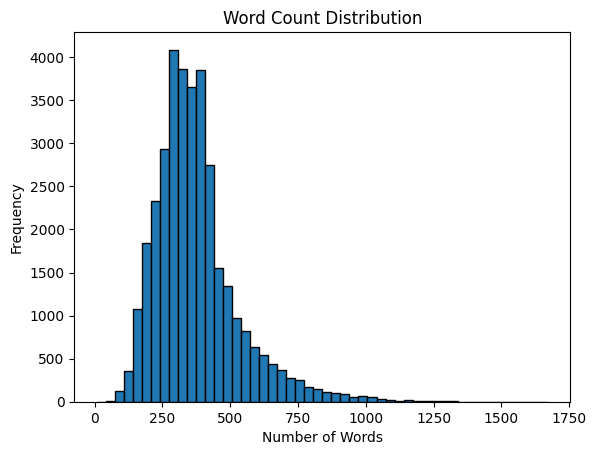

In [7]:
import matplotlib.pyplot as plt
import re

# 分词并计数单词个数
word_counts = [len(re.findall(r'\w+', text)) for text in balanced_train_dataset.text]

# 绘制直方图
plt.hist(word_counts, bins=50, edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [8]:
#train_dataset = concat([train_dataset.query('label==0').sample(48475), train_dataset.query('label==1')])

In [9]:
balanced_train_dataset.label.value_counts()

label
1    17500
0    17500
Name: count, dtype: int64

In [10]:
X_train = balanced_train_dataset.text
y_train = balanced_train_dataset.label

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
!pip install -q language-tool-python --no-index --find-links ../input/daigt-misc/
!mkdir -p /root/.cache/language_tool_python/
!cp -r /kaggle/input/daigt-misc/lang57/LanguageTool-5.7 /root/.cache/language_tool_python/LanguageTool-5.7

In [13]:
import numpy as np
import pandas as pd
import regex as re
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import language_tool_python
from concurrent.futures import ProcessPoolExecutor
from sklearn.naive_bayes import MultinomialNB
seed = 66

In [14]:
tool = language_tool_python.LanguageTool('en-US')
def correct_sentence(sentence):
    return tool.correct(sentence)
def correct_df(df):
    with ProcessPoolExecutor() as executor:
        df['text'] = list(executor.map(correct_sentence, df['text']))

In [15]:
from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)
from datasets import Dataset
from tqdm.auto import tqdm
from transformers import PreTrainedTokenizerFast
def dummy(text):
    return text

train = balanced_train_dataset
LOWERCASE = False
VOCAB_SIZE = 30522

# 创建 Byte-Pair Encoding Tokenizer
raw_tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
raw_tokenizer.normalizer = normalizers.Sequence([normalizers.NFC()] + [normalizers.Lowercase()] if LOWERCASE else [])
raw_tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()

# 添加特殊标记并创建训练实例
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.BpeTrainer(vocab_size=VOCAB_SIZE, special_tokens=special_tokens)

# 创建 Huggingface 数据集对象
dataset = Dataset.from_pandas(train[['text']])

# 训练 Tokenizer
def train_corp_iter(): 
    for i in range(0, len(dataset), 1000):
        yield dataset[i : i + 1000]["text"]
raw_tokenizer.train_from_iterator(train_corp_iter(), trainer=trainer)

# 将 Tokenizer 转换为适用于 Huggingface 的格式
tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=raw_tokenizer,
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]")

# Tokenizing 函数
def tokenize_function(text):
    return tokenizer.tokenize(text)

# 清洁文本
train['text'] = train['text'].str.replace('\n', '')

# 使用 BPE Tokenizer 作为 TF-IDF 的 tokenizer
vectorizer = TfidfVectorizer(ngram_range=(3, 5),
                             lowercase=False, 
                             sublinear_tf=True, 
                             analyzer = 'word',
                             tokenizer = tokenize_function,
                             preprocessor = dummy,
                             token_pattern = None,
                             strip_accents='unicode')

# 训练 TF-IDF Vectorizer 并转换文本
vectorizer = vectorizer.fit(train['text'])
X = vectorizer.transform(train['text'])
train['text'] = train['text'].str.replace('\n', '')
# df = pd.concat([train['text'], test['text']], axis=0)
df = train['text']

In [16]:
#vectorizer = TfidfVectorizer(ngram_range=(3, 5),tokenizer=lambda x: re.findall(r'[^\W]+', x), token_pattern=None, strip_accents='unicode')
#vectorizer = vectorizer.fit(train['text'])
#X = vectorizer.transform(df)

In [38]:
lr = LogisticRegression(max_iter=1200,C=100, penalty='l2')
clf = MultinomialNB(alpha=0.02)
sgd_model = SGDClassifier(max_iter=8000, tol=3e-4, verbose=100, loss="modified_huber") 
sgd_model2 = SGDClassifier(max_iter=12000, tol=5e-4, loss="modified_huber", class_weight="balanced")
sgd_model3 = SGDClassifier(max_iter=15000, tol=3e-4, loss="modified_huber", early_stopping=True)

In [39]:
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('mnb', clf), ('sgd', sgd_model), ('sgd2', sgd_model2), ('sgd3', sgd_model3)],
    weights=[0.20, 0.20, 0.20, 0.20, 0.20],
    voting='soft',
    verbose=1
)
ensemble.fit(X[:train.shape[0]], train.label)

[Voting] ....................... (1 of 5) Processing lr, total=11.8min
[Voting] ...................... (2 of 5) Processing mnb, total=   3.3s
-- Epoch 1
Norm: 60.74, NNZs: 17011654, Bias: -0.180917, T: 35000, Avg. loss: 0.124848
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 54.12, NNZs: 18332699, Bias: -0.208823, T: 70000, Avg. loss: 0.059460
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 52.62, NNZs: 18584976, Bias: -0.220645, T: 105000, Avg. loss: 0.062834
Total training time: 2.78 seconds.
-- Epoch 4
Norm: 51.96, NNZs: 18687416, Bias: -0.214378, T: 140000, Avg. loss: 0.063050
Total training time: 3.63 seconds.
-- Epoch 5
Norm: 51.54, NNZs: 18723541, Bias: -0.219385, T: 175000, Avg. loss: 0.063014
Total training time: 4.48 seconds.
-- Epoch 6
Norm: 51.29, NNZs: 18752737, Bias: -0.214110, T: 210000, Avg. loss: 0.063100
Total training time: 5.32 seconds.
-- Epoch 7
Norm: 51.11, NNZs: 18773116, Bias: -0.214733, T: 245000, Avg. loss: 0.063121
Total training time: 6.15 seconds.

VotingClassifier(estimators=[('lr', LogisticRegression(C=100, max_iter=1200)),
                             ('mnb', MultinomialNB(alpha=0.02)),
                             ('sgd',
                              SGDClassifier(loss='modified_huber',
                                            max_iter=8000, tol=0.0003,
                                            verbose=100)),
                             ('sgd2',
                              SGDClassifier(class_weight='balanced',
                                            loss='modified_huber',
                                            max_iter=12000, tol=0.0005)),
                             ('sgd3',
                              SGDClassifier(early_stopping=True,
                                            loss='modified_huber',
                                            max_iter=15000, tol=0.0003))],
                 verbose=1, voting='soft', weights=[0.2, 0.2, 0.2, 0.2, 0.2])

In [40]:
test1 = pd.read_csv('/kaggle/input/567testdata/Mistral7B_CME_v7_15_percent_corruption.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})
test2 = class_0_test

test_dataset = pd.concat([test1, test2])
# correct_df(test_dataset)

# split the dataset
test_dataset.text = test_dataset.text.str.replace('\n', ' ')
class_0 = test_dataset[test_dataset['label'] == 0]
class_1 = test_dataset[test_dataset['label'] == 1]

# 确定两个类别的样本数量
num_class_0 = len(class_0)
num_class_1 = len(class_1)

# 计算较小的样本数量
min_num = min(num_class_0, num_class_1)

# 对样本较多的类别进行随机抽样
if num_class_0 > min_num:
    class_0 = class_0.sample(n=min_num, random_state=42)  # random_state 确保结果的可复现性
elif num_class_1 > min_num:
    class_1 = class_1.sample(n=min_num, random_state=42)

# 合并数据集
balanced_test_dataset = pd.concat([class_0, class_1])

# 如果需要，可以打乱数据集的顺序
balanced_test_dataset = balanced_test_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_test_dataset

,text,label
0,"Dear State Senator, The Electoral College has...",0
1,"Dear TEACHER_NAME, I believe that policy 2 is...",0
2,The electoral collage should be disbanded. Not...,0
3,"Dear Principal, I believe that the policy for...",0
4,Dear state senator I'm against the Electoral ...,0
...,...,...
9795,"Introduction Mars, a neighboring planet to E...",1
9796,Venus is a planet that has fascinated scienti...,1
9797,"In his article ""The Challenge of Exploring Ve...",1
9798,"Dear state senator, I think we should'nt have...",0


In [41]:
X_test = vectorizer.transform(balanced_test_dataset['text'])
y_test = balanced_test_dataset['label']

In [42]:
y_pred_prob = ensemble.predict_proba(X_test)[:,1]
y_pred = ensemble.predict(X_test)

In [43]:
# from sklearn.metrics import roc_auc_score, accuracy_score
# auc = roc_auc_score(test[''], y_pred_prob)
# print("AUC:", auc)

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUCROC: ", roc_auc)

F1 Score: 0.9405341010622456
Accuracy: 0.9388775510204082
AUCROC:  0.9873862973760934


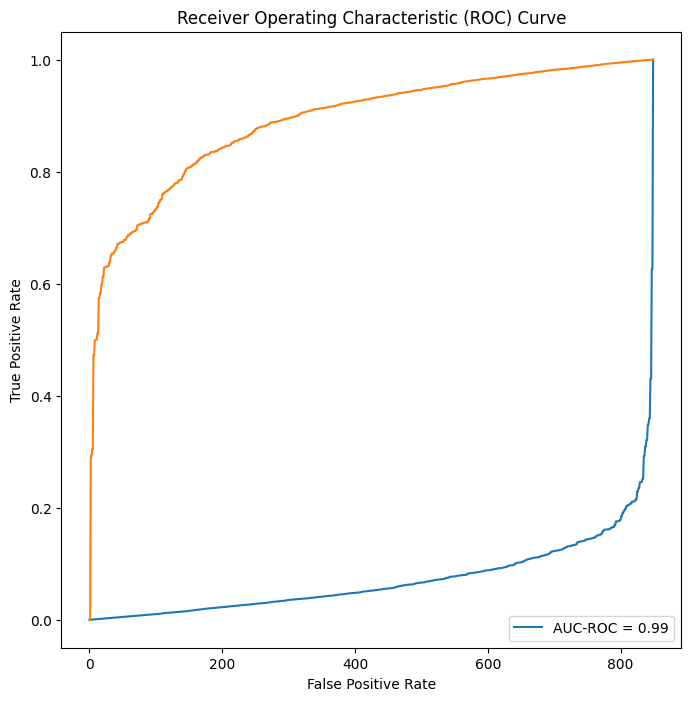

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 8))
plt.plot(fpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot(tpr)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
false_positives = sum((y_test[i] == 0) and (y_pred[i] == 1) for i in range(len(y_test)))
true_positives = sum((y_test[i] == 1) and (y_pred[i] == 1) for i in range(len(y_test)))
false_negatives = sum((y_test[i] == 1) and (y_pred[i] == 0) for i in range(len(y_test)))
true_negatives = sum((y_test[i] == 0) and (y_pred[i] == 0) for i in range(len(y_test)))
print(false_positives)
print(true_positives)
print(false_negatives)
print(true_negatives)
print(len(y_test))

488
4749
151
4412
9800


In [29]:
sgd_model = SGDClassifier(max_iter=8000, tol=3e-4, verbose=100, loss="modified_huber")
sgd_model.fit(X[:train.shape[0]], train.label)
y_pred_prob = sgd_model.predict_proba(X_test)[:,1]
y_pred = sgd_model.predict(X_test)

-- Epoch 1
Norm: 60.74, NNZs: 17012768, Bias: -0.192841, T: 35000, Avg. loss: 0.124871
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 54.11, NNZs: 18315251, Bias: -0.210469, T: 70000, Avg. loss: 0.059461
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 52.64, NNZs: 18596677, Bias: -0.213140, T: 105000, Avg. loss: 0.062892
Total training time: 2.85 seconds.
-- Epoch 4
Norm: 51.94, NNZs: 18669685, Bias: -0.219660, T: 140000, Avg. loss: 0.063072
Total training time: 3.66 seconds.
-- Epoch 5
Norm: 51.55, NNZs: 18717205, Bias: -0.218516, T: 175000, Avg. loss: 0.063103
Total training time: 4.47 seconds.
-- Epoch 6
Norm: 51.29, NNZs: 18745090, Bias: -0.206173, T: 210000, Avg. loss: 0.063051
Total training time: 5.30 seconds.
-- Epoch 7
Norm: 51.11, NNZs: 18763255, Bias: -0.211533, T: 245000, Avg. loss: 0.063069
Total training time: 6.12 seconds.
Convergence after 7 epochs took 6.19 seconds


In [30]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUCROC: ", roc_auc)

F1 Score: 0.9424350483953133
Accuracy: 0.9423469387755102
AUCROC:  0.9878325281132861


In [34]:
linear_model =  LogisticRegression(max_iter=1200,C=100, penalty='l2')
linear_model.fit(X[:train.shape[0]], train.label)
y_pred_prob = linear_model.predict_proba(X_test)[:,1]
y_pred = linear_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUCROC: ", roc_auc)

F1 Score: 0.9456236102688499
Accuracy: 0.9451020408163265
AUCROC:  0.9884703040399833


In [25]:
# import joblib
# joblib.dump(ensemble, 'voting_classifier_model.joblib')

In [ ]:
# test['generated'] = preds_test

# submission = pd.DataFrame({
#     'id': test["id"],
#     'generated': test['generated']
# })
# print(submission)
# submission.to_csv('submission.csv', index=False)